## importing necessary libraries

In [116]:
import pandas as pd   # for reading the csv file
import numpy as np     # for dea;ing with n-dimensional matrices
import matplotlib.pyplot as plt       # for plotting the results
from IPython.display import clear_output  


In [117]:
dataset=pd.read_csv("datasets/housing.csv")   # reading the housing.csv file (saved in the folder dataset) using read_csv() method of pandas' library
dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


# Data Cleaning 
## 1. making sure that our data is icluding only those features which are having integer or float as datatype 
### we do so by using pandas' select_dtypes() method.

In [118]:
dataset=dataset.select_dtypes(include=('float64','int64'))  #this will remove the 'ocean_proximity' feature
dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


## 2. making sure that our data is not having any NaN value
### check which feature is having NaN values with pandas.isna() method

In [119]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [120]:
#so here we find that 203 rows are there that are having NaN value in "total_bedrooms" feature
# we will drop those rows by dropna() method with axis=0 i.e., row-wise.

print("Initially, dataset.shape : ",dataset.shape)

dataset=dataset.dropna(axis=0) 

print("after dropping rows with Nan values, dataset.shape : ",dataset.shape)


Initially, dataset.shape :  (20640, 9)
after dropping rows with Nan values, dataset.shape :  (20433, 9)


## 3. Data Normalisation
## Here we are doing standard normalisation by subtraction data by mean and dividing it with standard deviation so that our data can be standardised with mean=0 and std=1

In [121]:
def scalar(x):
    return (x-x.mean(axis=0))/x.std(axis=0)

In [122]:
print("Before Normalisation: \n")
print("dataset.mean(): ",np.array(dataset.mean()))
print("dataset.std(): ",np.array(dataset.std()))

dataset =scalar(dataset)

print("\n After Normalisation: \n")
print("dataset.mean(): ",np.array(dataset.mean()))
print("dataset.std(): ",np.array(dataset.std()))

Before Normalisation: 

dataset.mean():  [-1.19570689e+02  3.56332213e+01  2.86330935e+01  2.63650423e+03
  5.37870553e+02  1.42494695e+03  4.99433465e+02  3.87116160e+00
  2.06864413e+05]
dataset.std():  [2.00357789e+00 2.13634767e+00 1.25918052e+01 2.18526957e+03
 4.21385070e+02 1.13320849e+03 3.82299226e+02 1.89929125e+00
 1.15435667e+05]

 After Normalisation: 

dataset.mean():  [-1.43321426e-12 -7.00868641e-14  1.66210162e-16  9.57949740e-17
 -1.99180520e-16 -3.85206584e-17 -9.05014058e-18 -2.50716483e-14
  6.80173928e-16]
dataset.std():  [1. 1. 1. 1. 1. 1. 1. 1. 1.]


# in multiivariate regression, we use more than one independent feature to predict tha target variable.
##             y=x1*m1 +x2*m2 + x3*m3 + .... x_n*m_n,      where n is the number of independent features we are using,     and we have one value of m i.e., slope (or weight ) for each independent feature and c is the intercept on y axis.

###               we are trying to fit a line for y in (n+1) dimensions
###              here the y, i.e., target variable is the 'median_house_value'

In [123]:
target= dataset['median_house_value']
target=np.array(target)
target=target.reshape(target.shape[0],1)
print("target.shape:  ",target.shape)

features=dataset.drop('median_house_value',axis=1)
features=np.array(features)
print("features.shape:  ",features.shape)


target.shape:   (20433, 1)
features.shape:   (20433, 8)


## y_predicted = x1*m1 + x2*m2.... xn*mn +c
### this can be written in matrix form as
##    y_predicted = X*Weights + Bias,            where Weights is an array of n slopes, i.e., len(Weights)=number_of_independent_features 

In [124]:
def linear_model(weights,x,bias):
    return np.matmul(x,weights)+bias


###  In Regression, we will be calculating the Mean Squared Error
###    error  = mean(  ( y_predicted - y_dataset ) ^2 )
#####  y_predicted will be calculated from our linear regression model.

In [126]:
def error(m,x,c,y):
    return np.mean((linear_model(m,x,x)-y)**2)


## Improving the performance of our model

### We need to minimise the error in order to improve the performance of our model.
### In the Error Function(weights,x,bias,y) .... x and y are from the dataset, that's why there are constant and the only parameter  which decide the  value of error are....  weights and bias
### So basically error is a function of weights and bias and we know we need to minimise the error.  For this, we need to find the best possible values of weights and bias for which our error will be minimum and performance will be maximum
### To find best values of weights and bias, We use Gradient Descent Algorithm.

In [127]:
# derivative wrt to weights

def derivative_wrt_weights(m,x,c,y):
    derivatives=2*np.mean(np.multiply(x,linear_model(m,x,c)-y),axis=0)
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(features.shape[1],1)
    return derivatives
     
# derivative wrt to bias

def derivative_wrt_bias(m,x,c,y):
    derivative=2*np.mean(linear_model(m,x,c)-y)
    derivative= np.array(derivative)
    derivative=derivative.reshape(1,1)
    return derivative

def accuracy(m,x,c,y):
    currentError = error(m,features,c,target)
    maxError = np.mean(target**2)
    return (1-(currentError / maxError))*100

## setting initial values for slope and intercept 

In [128]:
# selecting initial values from standard normal distribution
weights0=np.random.rand(features.shape[1],1)
bias0=np.random.rand(1,1)

# training the model by gradient descent algorithm by updating the values of weights and bias in the direction of gradients, i.e., derivative wrt weights and bias respectively


In [141]:
def model_train(alpha,num_of_iteration):
    weights=weights0
    bias=bias0
    error_cost=[]
    lr=[]
    for i in range(num_of_iteration):
        lr.append(alpha)
        if(i%150==49):
            alpha=alpha/1.005
        weights = weights - alpha * derivative_wrt_weights(weights,features,bias,target)
        bias = bias - alpha * derivative_wrt_bias(weights,features,bias,target)
        error_cost.append(error(weights,features,bias,target))
        print(error_cost[i])
        clear_output(True)
    plt.plot(error_cost)
    plt.xlabel("iteration number")
    plt.ylabel("Error")
    plt.show()
    plt.plot(lr)
    print("The error is : ",error(weights,features,bias,target))
    return weights,bias


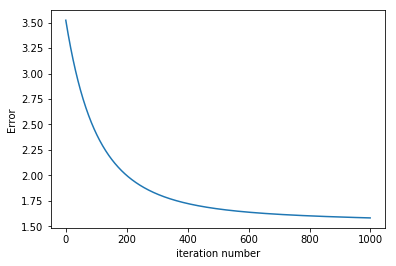

The error is :  1.581547643878997


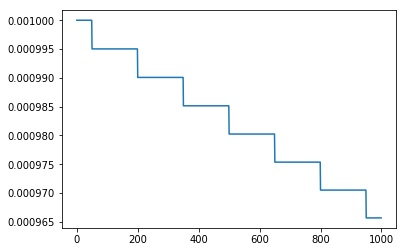

In [142]:
weights,bias =model_train(alpha=0.0010,num_of_iteration=1000)

# actual target values are in YELLOW and predicted values are in RED

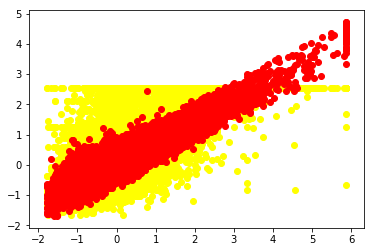

In [143]:
plt.scatter(dataset['median_income'],target,color='yellow')

plt.scatter(dataset['median_income'],linear_model(weights,features,bias),color='red')